In [1]:
#모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import re
import platform
import matplotlib.font_manager as fm

In [2]:
df = pd.read_csv('./gender.csv', encoding='euc_kr')

C:\Users\LJH\AppData\Local\Temp\ipykernel_12088\3386359088.py:1: DtypeWarning: Columns (99,100,101,102,103,197,198,199,200,305,306,309) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./gender.csv', encoding='euc_kr')


# 데이터 전처리 부분

In [3]:
# 우선 columns이 0, 1, 105, 208만 남김
df = df.iloc[: ,[0, 1, 105, 208]]

# '행정구역' 컬럼에서 필요없는 부분 제거
for i in range(0,len(df.index)):
    df['행정구역'][i] = re.split('[()]', df['행정구역'][i])
    df['행정구역'][i] = df['행정구역'][i][0]
    
# 컬럼명과 인덱스를 사용하기 쉽게 변경
df.columns = ['행정구역', '총인구', '남성인구', '여성인구']

# 숫자부분의 ,와 자료형을 int 로 변환
for i in range(1,4):
    for j in range(0, len(df.index)):
        df[df.columns[i]][j] = df[df.columns[i]][j].replace(',','')
        df[df.columns[i]][j] = int(df[df.columns[i]][j])

In [4]:
# 필요한 데이터 프레임 확보
df

,행정구역,총인구,남성인구,여성인구
0,서울특별시,9494807,4605655,4889152
1,서울특별시 종로구,143624,69513,74111
2,서울특별시 종로구 청운효자동,11803,5430,6373
3,서울특별시 종로구 사직동,9310,4154,5156
4,서울특별시 종로구 삼청동,2386,1130,1256
...,...,...,...,...
3862,제주특별자치도 서귀포시 서홍동,11254,5556,5698
3863,제주특별자치도 서귀포시 대륜동,15411,7802,7609
3864,제주특별자치도 서귀포시 대천동,13802,6980,6822
3865,제주특별자치도 서귀포시 중문동,12217,6197,6020


In [5]:
# 필요한 도시만 추출
list_city = []
for i in range(0,len(df.index)):
    if '대구광역시' in (df['행정구역'][i]):
        list_city.append(df.iloc[i])
df_city = pd.DataFrame(list_city)
df_city.reset_index(drop=True, inplace=True)

In [6]:
df_city

,행정구역,총인구,남성인구,여성인구
0,대구광역시,2375306,1169571,1205735
1,대구광역시 중구,78984,37920,41064
2,대구광역시 중구 동인동,7825,3917,3908
3,대구광역시 중구 삼덕동,6473,3063,3410
4,대구광역시 중구 성내1동,4870,2321,2549
...,...,...,...,...
148,대구광역시 달성군 옥포읍,24867,12516,12351
149,대구광역시 달성군 현풍읍,23171,12173,10998
150,대구광역시 달성군 가창면,7738,3854,3884
151,대구광역시 달성군 하빈면,3527,1906,1621


In [7]:
list_filed = ['중구', '동구', '서구', '남구', '북구', '수성구', '달서구', '전체']

In [8]:
# def calfiled(city)
# 각 군별 이름, 남성 수, 여성 수를 저장

list_name = []
list_male = []
list_female = []

# 필요한 부분찾기
for j in range(0, len(list_filed)):
    txt = list_filed[j]
    if j == len(list_filed) - 1 :
        list_name.append('대구광역시 전체')
        list_male.append(sum(list_male))
        list_female.append(sum(list_female))
        break
    for i in range(0, len(df.index)):
        if txt in df_city['행정구역'][i]:
            list_name.append(df_city.iloc[i][0])
            list_male.append(df_city.iloc[i][2])
            list_female.append(df_city.iloc[i][3])
            break

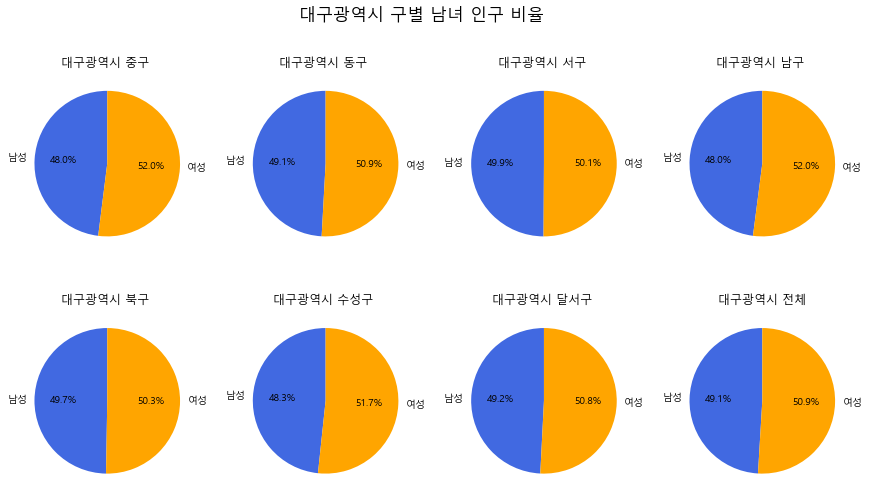

In [11]:
# 시각화
fig, axes = plt.subplots(2, int(len(list_name)/2) , figsize=(15, 8), sharex=True, sharey=True)
plt.suptitle('대구광역시 구별 남녀 인구 비율',fontsize=17)
color = ['royalblue', 'orange']

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='AppleGothic')

for i in range(len(list_name)) :
    population = [list_male[i], list_female[i]]
    
    if i <= 3 :
        axes[0, i].pie(population, labels=['남성', '여성'], autopct='%.1f%%', colors=color, startangle=90)
        axes[0, i].set_title(list_name[i])
    else :
        axes[1, i % 4].pie(population, labels=['남성', '여성'], autopct='%.1f%%', colors=color, startangle=90)
        axes[1, i % 4].set_title(list_name[i])
plt.show()